In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import zipfile

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
local_zip = "/content/drive/MyDrive/creditcard.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/credit_card")
zip_ref.close()

In [44]:
df = pd.read_csv("/credit_card/creditcard.csv")

**Balancing the data**

In [45]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [46]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [47]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [48]:
x_data= data.drop(columns=["Class", "Time"], axis=0)
label = data["Class"]

**Splitting Training and Test data**

In [49]:
x_data = data.sample(frac=1) # Shuffling the data
train_data_full= x_data.iloc[:689,:]
test_data_full = x_data.iloc[689:, :]
train_data = train_data_full.iloc[:, :-1]
train_labels = train_data_full.iloc[:, -1]
test_data = test_data_full.iloc[:, :-1]
test_labels = test_data_full.iloc[:, -1]

In [50]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(689, 30)
(295, 30)
(689,)
(295,)


**Normalizing the data**

In [51]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [52]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

**Building The Network**

In [53]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

**Training The Network**

In [54]:
history=model.fit(train_data, train_labels, epochs=40, validation_split=.2)

Epoch 1/40
18/18 [==============================] - 1s 17ms/step - loss: 0.7951 - accuracy: 0.5216 - val_loss: 0.7426 - val_accuracy: 0.6087
Epoch 2/40
18/18 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.5997 - val_loss: 0.6973 - val_accuracy: 0.7174
Epoch 3/40
18/18 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.7644 - val_loss: 0.6663 - val_accuracy: 0.8261
Epoch 4/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.8150 - val_loss: 0.6398 - val_accuracy: 0.8623
Epoch 5/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.8576 - val_loss: 0.6150 - val_accuracy: 0.8696
Epoch 6/40
18/18 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.8943 - val_loss: 0.5931 - val_accuracy: 0.8913
Epoch 7/40
18/18 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.8908 - val_loss: 0.5690 - val_accuracy: 0.8841
Epoch 8/40
18/18 [=

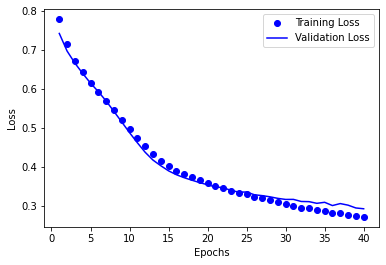

In [55]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

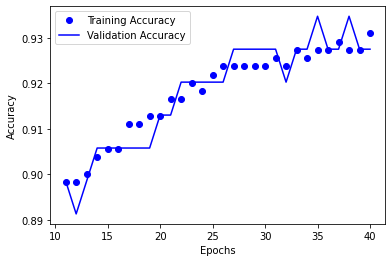

In [56]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[10:], acc[10:], "bo", label="Training Accuracy")
plt.plot(epochs[10:], val_acc[10:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Rebuilding the best fit Model**

In [57]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

**Training the model with all samples**

In [58]:
model.fit(train_data, train_labels, epochs=40)

Epoch 1/40
22/22 [==============================] - 1s 2ms/step - loss: 0.8246 - accuracy: 0.5100
Epoch 2/40
22/22 [==============================] - 0s 2ms/step - loss: 0.7679 - accuracy: 0.6327
Epoch 3/40
22/22 [==============================] - 0s 1ms/step - loss: 0.7082 - accuracy: 0.7987
Epoch 4/40
22/22 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.8657
Epoch 5/40
22/22 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.8351
Epoch 6/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8774
Epoch 7/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.8904
Epoch 8/40
22/22 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.8952
Epoch 9/40
22/22 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.9182
Epoch 10/40
22/22 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.9163
Epoch 11/40
22/22 [

**Evaluating the Network**

In [59]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9695


In [60]:
test_acc_score *100

96.94915413856506

**Predicting the values**

In [61]:
prediction=model.predict(test_data)
pred_norm =np.where(prediction>.5, 1, 0)

pred_norm[:10].T

array([[1, 1, 0, 0, 0, 1, 1, 0, 0, 0]])

In [62]:
prediction[:10].T

array([[1.        , 0.9417252 , 0.36981192, 0.30721653, 0.03670734,
        1.        , 0.5778934 , 0.08760777, 0.08713591, 0.0630554 ]],
      dtype=float32)

In [ ]:
test_labels[:].astype(dtype="int")

In [64]:
pred_check =pred_norm[:].T.astype(dtype="int")

In [70]:
c = pred_check.size

In [66]:
comapre_pred_test = test_labels == pred_check

In [71]:
a = comapre_pred_test[comapre_pred_test[:]== False].size

In [72]:
b = comapre_pred_test[comapre_pred_test[:]==True].size

In [69]:
print("Incorrect Predictions are:", a, "and Correct predictions are :", b, " the percentage is:", round((b/c)*100,2), "%"  )

Incorrect Predictions are: 9 and Correct predictions are : 286  the percentage is: 96.95 %
